In [1]:
import re
import numpy

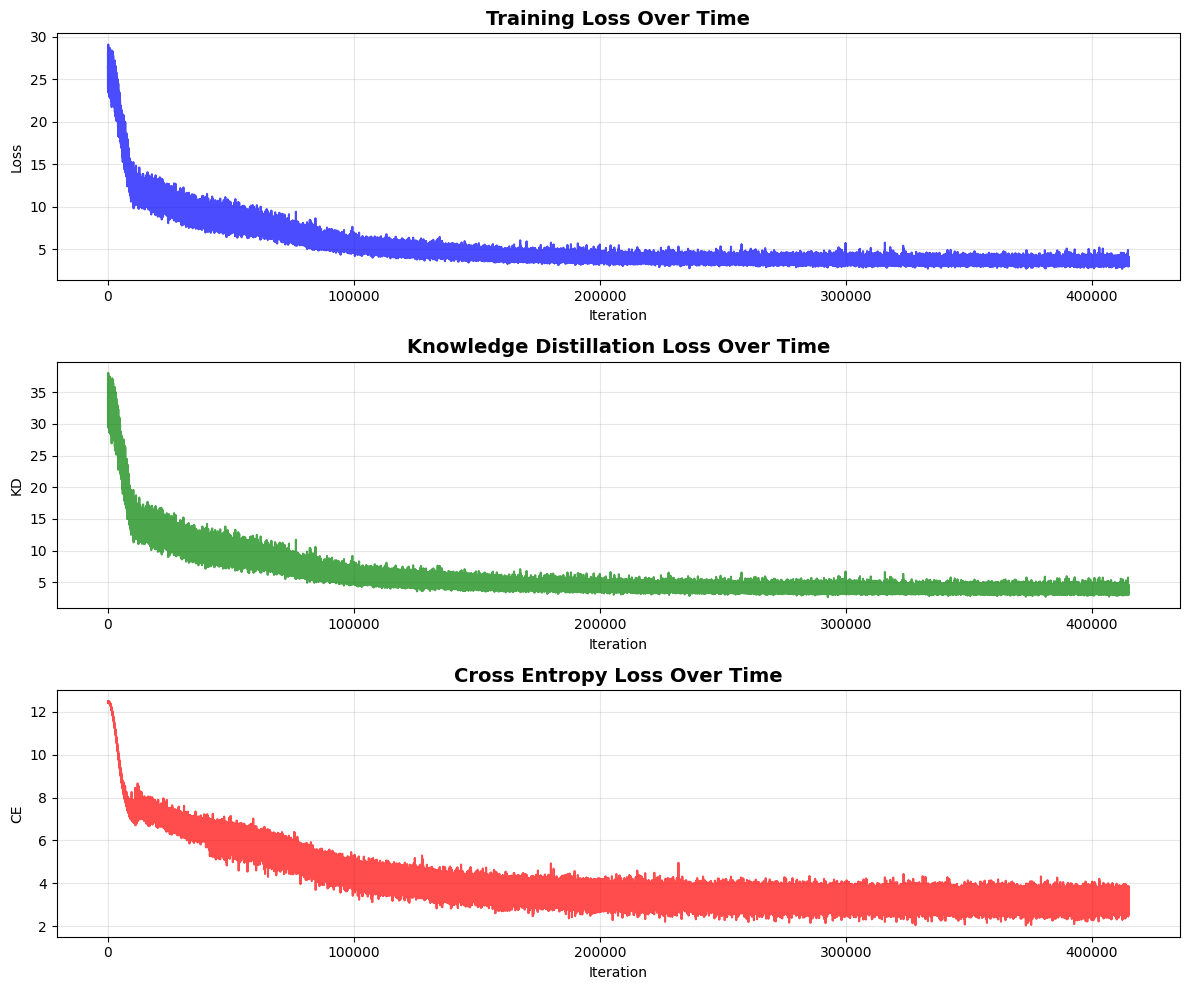

Summary Statistics:

Loss - Min: 2.7217, Max: 29.0852, Mean: 5.2727, Final: 3.8054
KD   - Min: 2.6568, Max: 38.0306, Mean: 5.8796, Final: 4.1153
CE   - Min: 2.0313, Max: 12.4993, Mean: 4.1456, Final: 3.2299

Total iterations found: 415068


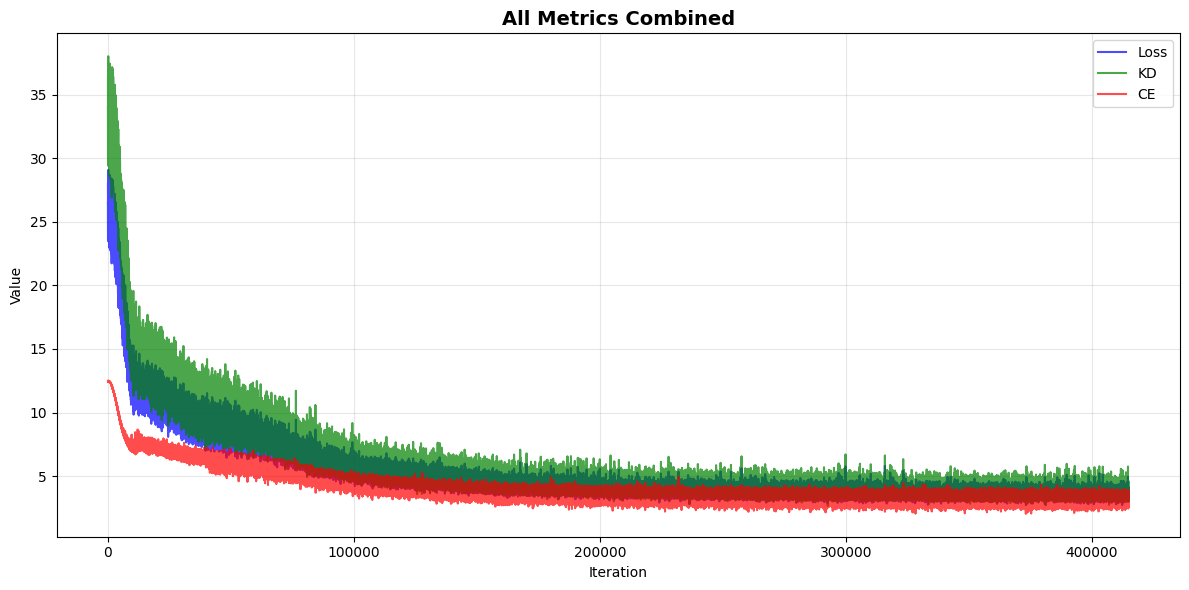

In [5]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the log file
with open('/home/krrish/Desktop/Programming/slm-distill/logs/train.log', 'r') as f:
    log_data = f.read()

# Regex pattern to extract loss, kd, and ce values
pattern = r'loss=(\d+\.\d+),\s*kd=(\d+\.\d+),\s*ce=(\d+\.\d+)'

# Extract all matches
matches = re.findall(pattern, log_data)

# Convert to numpy arrays for easier plotting
loss_values = np.array([float(m[0]) for m in matches])
kd_values = np.array([float(m[1]) for m in matches])
ce_values = np.array([float(m[2]) for m in matches])

# Create iteration numbers (x-axis)
iterations = np.arange(len(loss_values))

# Create the plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot Loss
axes[0].plot(iterations, loss_values, color='blue', linewidth=1.5, alpha=0.7)
axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].grid(True, alpha=0.3)

# Plot KD (Knowledge Distillation)
axes[1].plot(iterations, kd_values, color='green', linewidth=1.5, alpha=0.7)
axes[1].set_title('Knowledge Distillation Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('KD')
axes[1].grid(True, alpha=0.3)

# Plot CE (Cross Entropy)
axes[2].plot(iterations, ce_values, color='red', linewidth=1.5, alpha=0.7)
axes[2].set_title('Cross Entropy Loss Over Time', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('CE')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Summary Statistics:")
print(f"\nLoss - Min: {loss_values.min():.4f}, Max: {loss_values.max():.4f}, Mean: {loss_values.mean():.4f}, Final: {loss_values[-1]:.4f}")
print(f"KD   - Min: {kd_values.min():.4f}, Max: {kd_values.max():.4f}, Mean: {kd_values.mean():.4f}, Final: {kd_values[-1]:.4f}")
print(f"CE   - Min: {ce_values.min():.4f}, Max: {ce_values.max():.4f}, Mean: {ce_values.mean():.4f}, Final: {ce_values[-1]:.4f}")
print(f"\nTotal iterations found: {len(loss_values)}")

# Optional: Create a combined plot
fig2, ax = plt.subplots(figsize=(12, 6))
ax.plot(iterations, loss_values, label='Loss', color='blue', linewidth=1.5, alpha=0.7)
ax.plot(iterations, kd_values, label='KD', color='green', linewidth=1.5, alpha=0.7)
ax.plot(iterations, ce_values, label='CE', color='red', linewidth=1.5, alpha=0.7)
ax.set_title('All Metrics Combined', fontsize=14, fontweight='bold')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# Cell: Evaluate Checkpoint with Fill-Mask Examples

import torch
from transformers import XLMRobertaForMaskedLM, AutoTokenizer, pipeline

# ============================================================
# 1. SETUP
# ============================================================
CHECKPOINT_PATH = "/home/krrish/Desktop/Programming/slm-distill/outputs/final_model"  # Change to your checkpoint path
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("="*60)
print("CHECKPOINT EVALUATION - FILL MASK TEST")
print("="*60)
print(f"Checkpoint: {CHECKPOINT_PATH}")
print(f"Device: {DEVICE}")
print("="*60)

# ============================================================
# 2. LOAD MODEL & TOKENIZER
# ============================================================
print("\nLoading model and tokenizer...")

# Load tokenizer (use XLM-RoBERTa tokenizer)
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")

# Load your trained model
model = XLMRobertaForMaskedLM.from_pretrained(CHECKPOINT_PATH)
model.to(DEVICE)
model.eval()

# Model info
num_params = sum(p.numel() for p in model.parameters()) / 1e6
print(f"✓ Model loaded: {num_params:.1f}M parameters")

# ============================================================
# 3. CREATE FILL-MASK PIPELINE
# ============================================================
fill_mask = pipeline(
    "fill-mask",
    model=model,
    tokenizer=tokenizer,
    device=0 if DEVICE == "cuda" else -1
)

# ============================================================
# 4. TEST WITH HINDI EXAMPLES
# ============================================================
print("\n" + "="*60)
print("FILL-MASK PREDICTIONS")
print("="*60)

test_sentences = [
    # Complex sentences with multiple context clues
    "भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने <mask> आंदोलन का नेतृत्व किया",  
    # Mahatma Gandhi led the <mask> movement in the Indian independence struggle
    
    "विज्ञान और <mask> के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है",  
    # India has made remarkable progress in the field of science and <mask>
    
    "हिमालय पर्वत श्रृंखला एशिया की सबसे <mask> पर्वत श्रृंखला है",  
    # The Himalayan mountain range is the most <mask> mountain range in Asia
    
    "भारतीय संविधान दुनिया का सबसे <mask> लिखित संविधान माना जाता है",  
    # The Indian Constitution is considered the world's most <mask> written constitution
    
    "आधुनिक युग में <mask> और संचार प्रौद्योगिकी ने जीवन को पूरी तरह बदल दिया है",  
    # In the modern era, <mask> and communication technology has completely transformed life
    
    "भारतीय अर्थव्यवस्था कृषि, उद्योग और <mask> क्षेत्र पर आधारित है",  
    # The Indian economy is based on agriculture, industry and the <mask> sector
    
    "शिक्षा प्रणाली में <mask> और नवाचार की आवश्यकता है",  
    # The education system needs <mask> and innovation
    
    "जलवायु परिवर्तन एक <mask> समस्या है जिसका समाधान तत्काल आवश्यक है",  
    # Climate change is a <mask> problem that requires immediate solution
    
    "भारतीय संस्कृति में <mask> और परंपराओं का विशेष महत्व है",  
    # In Indian culture, <mask> and traditions have special significance
    
    "डिजिटल इंडिया अभियान के तहत <mask> सेवाओं का विस्तार किया जा रहा है",
    # Under the Digital India campaign, <mask> services are being expanded
    
    "थर्मोडायनामिक्स का द्वितीय <mask> एंट्रॉपी की अपरिवर",
    
    "आज मौसम <mask> अच्छा है।",
    
    "सामाजिक न्याय और समानता के <mask> आधारित नीतियां बनाई जा रही हैं।"
]

for i, sentence in enumerate(test_sentences, 1):
    print(f"\n{i}. Input: {sentence}")
    print("-" * 60)
    
    try:
        predictions = fill_mask(sentence, top_k=5)
        
        for rank, pred in enumerate(predictions, 1):
            token = pred['token_str'].strip()
            score = pred['score']
            filled = pred['sequence']
            
            print(f"   {rank}. {token:15s} (score: {score:.4f})")
            
        # Show the top prediction in context
        print(f"\n   → Best: {predictions[0]['sequence']}")
        
    except Exception as e:
        print(f"   ⚠ Error: {e}")

print("\n" + "="*60)
print("EVALUATION COMPLETE")
print("="*60)

CHECKPOINT EVALUATION - FILL MASK TEST
Checkpoint: /home/krrish/Desktop/Programming/slm-distill/outputs/final_model
Device: cuda

Loading model and tokenizer...


Device set to use cuda:0


✓ Model loaded: 33.1M parameters

FILL-MASK PREDICTIONS

1. Input: भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने <mask> आंदोलन का नेतृत्व किया
------------------------------------------------------------
   1. अपने            (score: 0.1208)
   2. भारतीय          (score: 0.0857)
   3. इस              (score: 0.0608)
   4. स्वतंत्रता      (score: 0.0552)
   5. राष्ट्रीय       (score: 0.0545)

   → Best: भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने अपने आंदोलन का नेतृत्व किया

2. Input: विज्ञान और <mask> के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है
------------------------------------------------------------
   1. भारत            (score: 0.3323)
   2. विज्ञान         (score: 0.2020)
   3. देश             (score: 0.0526)
   4. यूरोप           (score: 0.0310)
   5. विश्व           (score: 0.0238)

   → Best: विज्ञान और भारत के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है

3. Input: हिमालय पर्वत श्रृंखला एशिया की सबसे <mask> पर्वत श्रृंखला है
----------------------------------------------

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   1. कृषि            (score: 0.2595)
   2. खाद्य           (score: 0.0800)
   3. विकास           (score: 0.0790)
   4. आर्थिक          (score: 0.0399)
   5. औद्योगिक        (score: 0.0390)

   → Best: भारतीय अर्थव्यवस्था कृषि, उद्योग और कृषि क्षेत्र पर आधारित है

7. Input: शिक्षा प्रणाली में <mask> और नवाचार की आवश्यकता है
------------------------------------------------------------
   1. सुधार           (score: 0.0603)
   2. शिक्षा          (score: 0.0501)
   3. विकास           (score: 0.0310)
   4. वृद्धि          (score: 0.0214)
   5. चिकित्सा        (score: 0.0210)

   → Best: शिक्षा प्रणाली में सुधार और नवाचार की आवश्यकता है

8. Input: जलवायु परिवर्तन एक <mask> समस्या है जिसका समाधान तत्काल आवश्यक है
------------------------------------------------------------
   1. महत्वपूर्ण      (score: 0.2613)
   2. विशेष           (score: 0.0599)
   3. आवश्यक          (score: 0.0432)
   4. बड़ी            (score: 0.0403)
   5. जटिल            (score: 0.0304)

   → Best: जलवायु परिवर्तन एक मह

In [8]:
hindi_eval_data = [
    # Simple everyday sentences (1-20)
    "मैं स्कूल जाता हूँ।",
    "आज मौसम बहुत अच्छा है।",
    "मुझे खाना पसंद है।",
    "वह किताब पढ़ रहा है।",
    "बच्चे पार्क में खेल रहे हैं।",
    "मेरा नाम राज है।",
    "सूरज पूर्व से निकलता है।",
    "मुझे चाय चाहिए।",
    "यह मेरा घर है।",
    "वे बाजार गए हैं।",
    "आज सोमवार है।",
    "मैं काम कर रहा हूँ।",
    "फूल बहुत सुंदर हैं।",
    "पानी पीना जरूरी है।",
    "मैं अपने दोस्त से मिला।",
    "रात हो गई है।",
    "मुझे नींद आ रही है।",
    "गाड़ी बहुत तेज चल रही है।",
    "बारिश हो रही है।",
    "मैं संगीत सुन रहा हूँ।",
    
    # Moderate complexity - Common expressions (21-40)
    "समय का सदुपयोग करना चाहिए।",
    "परिश्रम सफलता की कुंजी है।",
    "शिक्षा जीवन का आधार है।",
    "स्वास्थ्य ही सबसे बड़ा धन है।",
    "अतिथि देवो भव का सिद्धांत हमारी संस्कृति में महत्वपूर्ण है।",
    "प्रकृति का संरक्षण हम सभी का दायित्व है।",
    "ईमानदारी सर्वोत्तम नीति है।",
    "संयम और धैर्य से हर समस्या का समाधान मिल सकता है।",
    "ज्ञान ही शक्ति है और शिक्षा उसका माध्यम।",
    "मेहनत का फल हमेशा मीठा होता है।",
    "जीवन में सकारात्मक सोच रखना बेहद आवश्यक है।",
    "परोपकार मानव जीवन का सार है।",
    "अनुशासन सफल जीवन की नींव है।",
    "आत्मविश्वास किसी भी लक्ष्य को प्राप्त करने में सहायक है।",
    "समय और समुद्र किसी का इंतजार नहीं करते।",
    "जहाँ चाह वहाँ राह निकल आती है।",
    "विनम्रता व्यक्तित्व का सबसे बड़ा आभूषण है।",
    "संघर्ष के बिना सफलता का मूल्य नहीं समझा जा सकता।",
    "माता-पिता का सम्मान करना हमारा परम कर्तव्य है।",
    "एकता में ही शक्ति निहित है।",
    
    # Moderate-High complexity - News/Formal (41-60)
    "सरकार ने नई शिक्षा नीति के तहत महत्वपूर्ण सुधारों की घोषणा की है।",
    "जलवायु परिवर्तन वैश्विक स्तर पर एक गंभीर चुनौती बन गया है।",
    "प्रधानमंत्री ने राष्ट्र के नाम अपने संबोधन में विकास के नए आयामों पर प्रकाश डाला।",
    "वैज्ञानिकों ने चिकित्सा विज्ञान के क्षेत्र में एक नई खोज की है।",
    "आर्थिक सुधारों से देश की अर्थव्यवस्था को नई गति मिलने की उम्मीद है।",
    "डिजिटल क्रांति ने सूचना प्रौद्योगिकी के क्षेत्र में अभूतपूर्व परिवर्तन लाए हैं।",
    "संविधान में वर्णित मौलिक अधिकार प्रत्येक नागरिक के लिए समान रूप से लागू होते हैं।",
    "कृषि क्षेत्र में आधुनिक तकनीकों के उपयोग से उत्पादकता में वृद्धि हुई है।",
    "पर्यावरण संरक्षण के लिए सरकार द्वारा कई महत्वाकांक्षी योजनाएं चलाई जा रही हैं।",
    "शैक्षणिक संस्थानों में गुणवत्तापूर्ण शिक्षा सुनिश्चित करना प्राथमिकता है।",
    "सामाजिक न्याय और समानता के सिद्धांतों पर आधारित नीतियां बनाई जा रही हैं।",
    "तकनीकी प्रगति ने मानव जीवन के हर पहलू को प्रभावित किया है।",
    "राष्ट्रीय सुरक्षा देश की सर्वोच्च प्राथमिकता है।",
    "वित्तीय समावेशन के माध्यम से समाज के सभी वर्गों को बैंकिंग सेवाओं से जोड़ा जा रहा है।",
    "नवीकरणीय ऊर्जा स्रोतों का विकास भविष्य की ऊर्जा सुरक्षा के लिए अनिवार्य है।",
    "महिला सशक्तिकरण सामाजिक विकास का एक महत्वपूर्ण पहलू है।",
    "बुनियादी ढांचे के विकास में निवेश से आर्थिक विकास को गति मिलती है।",
    "न्यायपालिका की स्वतंत्रता लोकतंत्र की आधारशिला है।",
    "भ्रष्टाचार निवारण के लिए कड़े कानूनी प्रावधान आवश्यक हैं।",
    "सार्वजनिक स्वास्थ्य व्यवस्था को मजबूत करना सरकार की प्राथमिकता है।",
    
    # High complexity - Literary/Philosophical (61-80)
    "जीवन की नश्वरता का बोध होते हुए भी मनुष्य अपने कर्तव्यों का निर्वहन करता रहता है।",
    "कालिदास की रचनाओं में प्रकृति और मानव भावनाओं का अद्भुत समन्वय दृष्टिगोचर होता है।",
    "अस्तित्ववाद दर्शन के अनुसार मनुष्य अपने चयनों के माध्यम से स्वयं को परिभाषित करता है।",
    "वेदांत दर्शन में आत्मा और परमात्मा की एकता का सिद्धांत प्रतिपादित किया गया है।",
    "सामाजिक विषमता और आर्थिक असमानता समकालीन समाज की प्रमुख समस्याएं हैं।",
    "भक्तिकाल के कवियों ने भक्ति और प्रेम के माध्यम से आध्यात्मिक चेतना को जागृत किया।",
    "उत्तर-आधुनिकतावाद ने परंपरागत मूल्यों और विचारधाराओं को चुनौती दी है।",
    "मानवीय चेतना का विकास सांस्कृतिक और ऐतिहासिक संदर्भों में निहित है।",
    "अज्ञेय की कविताओं में प्रयोगवादी शैली और व्यक्तिवादी दृष्टिकोण का संगम मिलता है।",
    "सत्य की खोज मानव जीवन का सर्वोच्च उद्देश्य माना गया है।",
    "रहस्यवाद में दैवीय शक्ति के साथ मानव आत्मा के संवाद की अभिव्यक्ति होती है।",
    "निराला के काव्य में छायावादी रोमानियत और सामाजिक यथार्थ का सुंदर संश्लेषण है।",
    "अभिव्यंजनावाद ने कला में व्यक्तिगत भावनाओं की अभिव्यक्ति को महत्व दिया।",
    "गांधीवादी विचारधारा में अहिंसा और सत्याग्रह के सिद्धांत केंद्रीय हैं।",
    "प्रेमचंद की कथाओं में ग्रामीण जीवन की वास्तविकता और सामाजिक विसंगतियों का चित्रण मिलता है।",
    "अलंकार शास्त्र में काव्य सौंदर्य के विभिन्न तत्वों का विश्लेषण किया गया है।",
    "मनोविश्लेषणात्मक दृष्टिकोण से साहित्य में अवचेतन मन की भूमिका महत्वपूर्ण है।",
    "संरचनावाद ने भाषा और साहित्य के अध्ययन में नए आयाम जोड़े हैं।",
    "भारतीय सौंदर्यशास्त्र में रस सिद्धांत का विशिष्ट स्थान है।",
    "अस्मितावादी विमर्श ने साहित्य में हाशिए के समुदायों को स्वर दिया है।",
    
    # Very high complexity - Technical/Scientific (81-100)
    "क्वांटम यांत्रिकी में अनिश्चितता का सिद्धांत सूक्ष्म कणों के व्यवहार की मौलिक सीमाओं को प्रतिपादित करता है।",
    "आण्विक जीव विज्ञान में डीएनए प्रतिकृति की प्रक्रिया अत्यंत जटिल और परिशुद्ध है।",
    "सापेक्षता के सामान्य सिद्धांत ने गुरुत्वाकर्षण को समय-अंतरिक्ष की वक्रता के रूप में व्याख्यायित किया।",
    "न्यूरोबायोलॉजी में सिनैप्टिक प्लास्टिसिटी स्मृति निर्माण की आधारभूत प्रक्रिया है।",
    "कृत्रिम बुद्धिमत्ता में गहन शिक्षण एल्गोरिदम पैटर्न पहचान में क्रांतिकारी परिणाम दे रहे हैं।",
    "थर्मोडायनामिक्स का द्वितीय नियम एंट्रॉपी की अपरिवर्तनीय वृद्धि को निर्दिष्ट करता है।",
    "जैव रसायन में एंजाइमेटिक उत्प्रेरण की क्रियाविधि सब्सट्रेट विशिष्टता पर आधारित है।",
    "क्वांटम संगणन में क्यूबिट्स की अध्यारोपण अवस्था पारंपरिक बिट्स की तुलना में अधिक सूचना प्रसंस्करण क्षमता प्रदान करती है।",
    "खगोल भौतिकी में ब्लैक होल की घटना क्षितिज से परे सूचना का निष्कर्षण असंभव माना जाता है।",
    "आनुवंशिक अभियांत्रिकी में क्रिस्पर-कैस9 तकनीक जीनोम संपादन में परिशुद्धता लाती है।",
    "नैनो प्रौद्योगिकी में परमाणु स्तर पर पदार्थों का नियंत्रण नवीन गुणधर्मों को सृजित करता है।",
    "पारिस्थितिकी तंत्र में ट्रॉफिक स्तरों के माध्यम से ऊर्जा का प्रवाह ऊष्मागतिकी के नियमों द्वारा शासित होता है।",
    "क्रिप्टोग्राफी में सार्वजनिक कुंजी एन्क्रिप्शन संख्या सिद्धांत के जटिल प्रमेयों पर आधारित है।",
    "न्यूरोएंडोक्राइनोलॉजी हार्मोनल और तंत्रिका तंत्र के बीच जटिल अंतःक्रियाओं का अध्ययन करती है।",
    "क्वांटम फील्ड सिद्धांत में कण और तरंग की द्वैतता मौलिक है।",
    "प्रोटिओमिक्स में प्रोटीन की संरचना और कार्य का विश्लेषण जटिल स्पेक्ट्रोस्कोपिक विधियों द्वारा किया जाता है।",
    "टोपोलॉजिकल इंसुलेटर्स में सतह अवस्थाएं असामान्य इलेक्ट्रॉनिक गुणधर्म प्रदर्शित करती हैं।",
    "सिस्टम बायोलॉजी जैविक प्रणालियों को समग्र और अंतःक्रियात्मक नेटवर्क के रूप में मॉडल करती है।",
    "मेटामटेरियल्स में विद्युत चुम्बकीय तरंगों का असामान्य व्यवहार उनकी कृत्रिम संरचना से उत्पन्न होता है।",
    "एपिजेनेटिक्स में डीएनए अनुक्रम में परिवर्तन के बिना जीन अभिव्यक्ति का नियमन अध्ययन का केंद्र है।"
]

In [17]:
english_eval_data = [
    # Simple everyday sentences (1-20)
    "I go to school every day.",
    "The weather is very nice today.",
    "I like eating pizza.",
    "He is reading a book.",
    "The children are playing in the park.",
    "My name is John.",
    "The sun rises in the east.",
    "I want some coffee.",
    "This is my house.",
    "They went to the store.",
    "Today is Monday.",
    "I am working right now.",
    "The flowers are beautiful.",
    "Drinking water is important.",
    "I met my friend yesterday.",
    "It's getting dark outside.",
    "I feel sleepy now.",
    "The car is moving fast.",
    "It is raining heavily.",
    "I am listening to music.",
    
    # Moderate complexity - Common expressions (21-40)
    "Time management is essential for success.",
    "Hard work is the key to achievement.",
    "Education is the foundation of life.",
    "Health is the greatest wealth.",
    "Treating guests with respect is part of our culture.",
    "Protecting nature is everyone's responsibility.",
    "Honesty is always the best policy.",
    "Patience and perseverance solve every problem.",
    "Knowledge is power and education is its medium.",
    "Hard work always pays off in the end.",
    "Maintaining a positive attitude is crucial in life.",
    "Helping others is the essence of humanity.",
    "Discipline is the foundation of a successful life.",
    "Self-confidence helps achieve any goal.",
    "Time and tide wait for no one.",
    "Where there's a will, there's a way.",
    "Humility is the greatest virtue of personality.",
    "Success cannot be appreciated without struggle.",
    "Respecting parents is our primary duty.",
    "Unity is strength in all circumstances.",
    
    # Moderate-High complexity - News/Formal (41-60)
    "The government has announced significant reforms under the new education policy.",
    "Climate change has become a serious challenge at the global level.",
    "The Prime Minister addressed the nation highlighting new dimensions of development.",
    "Scientists have made a breakthrough discovery in medical science.",
    "Economic reforms are expected to provide new momentum to the country's economy.",
    "The digital revolution has brought unprecedented changes in information technology.",
    "Fundamental rights enshrined in the constitution apply equally to every citizen.",
    "The use of modern techniques in agriculture has increased productivity significantly.",
    "Several ambitious programs are being implemented by the government for environmental protection.",
    "Ensuring quality education in educational institutions is a top priority.",
    "Policies based on principles of social justice and equality are being formulated.",
    "Technological progress has affected every aspect of human life.",
    "National security is the country's highest priority.",
    "Through financial inclusion, all sections of society are being connected to banking services.",
    "Development of renewable energy sources is essential for future energy security.",
    "Women's empowerment is an important aspect of social development.",
    "Investment in infrastructure development accelerates economic growth.",
    "Independence of the judiciary is the cornerstone of democracy.",
    "Strict legal provisions are necessary for corruption prevention.",
    "Strengthening the public health system is the government's priority.",
    
    # High complexity - Literary/Philosophical (61-80)
    "Despite awareness of life's transience, humans continue to fulfill their duties.",
    "Kalidasa's works display a remarkable synthesis of nature and human emotions.",
    "According to existentialist philosophy, humans define themselves through their choices.",
    "Vedantic philosophy propounds the principle of unity between the soul and the supreme being.",
    "Social inequality and economic disparity are major problems of contemporary society.",
    "Bhakti period poets awakened spiritual consciousness through devotion and love.",
    "Post-modernism has challenged traditional values and ideologies systematically.",
    "The development of human consciousness is embedded in cultural and historical contexts.",
    "Ajneya's poetry reveals a confluence of experimental style and individualistic perspective.",
    "The pursuit of truth has been considered the supreme purpose of human life.",
    "Mysticism expresses the dialogue between the human soul and divine power.",
    "Nirala's poetry beautifully synthesizes romantic idealism and social realism.",
    "Expressionism emphasized the expression of personal emotions in art.",
    "Gandhian ideology centers on the principles of non-violence and civil disobedience.",
    "Premchand's narratives depict the reality of rural life and social contradictions.",
    "Rhetoric analyzes various elements of poetic beauty in literature.",
    "From a psychoanalytic perspective, the role of the subconscious mind is significant in literature.",
    "Structuralism has added new dimensions to the study of language and literature.",
    "The theory of rasa holds a distinctive place in Indian aesthetics.",
    "Identity discourse has given voice to marginalized communities in literature.",
    
    # Very high complexity - Technical/Scientific (81-100)
    "The uncertainty principle in quantum mechanics establishes fundamental limits on the behavior of subatomic particles.",
    "The process of DNA replication in molecular biology is extremely complex and precise.",
    "General relativity theory interpreted gravity as the curvature of spacetime continuum.",
    "Synaptic plasticity in neurobiology is the fundamental process of memory formation.",
    "Deep learning algorithms in artificial intelligence are producing revolutionary results in pattern recognition.",
    "The second law of thermodynamics specifies the irreversible increase of entropy.",
    "The mechanism of enzymatic catalysis in biochemistry is based on substrate specificity.",
    "The superposition state of qubits in quantum computing provides greater information processing capacity than traditional bits.",
    "In astrophysics, information extraction beyond the event horizon of a black hole is considered impossible.",
    "CRISPR-Cas9 technology in genetic engineering brings precision to genome editing.",
    "Control of materials at the atomic level in nanotechnology creates novel properties.",
    "Energy flow through trophic levels in ecosystems is governed by thermodynamic laws.",
    "Public key encryption in cryptography is based on complex theorems of number theory.",
    "Neuroendocrinology studies the complex interactions between hormonal and nervous systems.",
    "Particle-wave duality is fundamental in quantum field theory.",
    "Analysis of protein structure and function in proteomics is performed through complex spectroscopic methods.",
    "Surface states in topological insulators exhibit unusual electronic properties.",
    "Systems biology models biological systems as holistic and interactive networks.",
    "The anomalous behavior of electromagnetic waves in metamaterials arises from their artificial structure.",
    "Epigenetics focuses on regulation of gene expression without changes in DNA sequence."
]

In [21]:
# Quick Perplexity Test

import torch
from transformers import XLMRobertaForMaskedLM, AutoTokenizer
import numpy as np

# Load
checkpoint = "/home/krrish/Desktop/Programming/slm-distill/outputs/best_model"
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")
model = XLMRobertaForMaskedLM.from_pretrained(checkpoint).to("cuda").eval()

# Test sentences
sentences = [
    # History & Independence
    "भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने अहिंसक आंदोलन का नेतृत्व किया",
    "सुभाष चंद्र बोस ने आजाद हिंद फौज का गठन करके ब्रिटिश साम्राज्य के खिलाफ संघर्ष किया",
    "भारत को पंद्रह अगस्त उन्नीस सौ सैंतालीस को स्वतंत्रता प्राप्त हुई",
    "जवाहरलाल नेहरू भारत के प्रथम प्रधानमंत्री थे और उन्होंने आधुनिक भारत की नींव रखी",
    "भगत सिंह, राजगुरु और सुखदेव ने देश की आजादी के लिए अपने प्राणों की आहुति दी",
    "रानी लक्ष्मीबाई ने अंग्रेजों के विरुद्ध वीरतापूर्वक युद्ध किया और भारतीय इतिहास में अमर हो गईं",
    
    # Science & Technology
    "विज्ञान और प्रौद्योगिकी के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है",
    "आधुनिक युग में सूचना और संचार प्रौद्योगिकी ने जीवन को बदल दिया है",
    "भारतीय अंतरिक्ष अनुसंधान संगठन ने चंद्रयान और मंगलयान मिशन सफलतापूर्वक पूरे किए",
    "कृत्रिम बुद्धिमत्ता और मशीन लर्निंग आधुनिक तकनीक का महत्वपूर्ण हिस्सा बन गए हैं",
    "क्वांटम कंप्यूटिंग भविष्य की कम्प्यूटेशनल शक्ति को परिभाषित करने वाली तकनीक है",
    "नैनो प्रौद्योगिकी चिकित्सा, इलेक्ट्रॉनिक्स और सामग्री विज्ञान में क्रांतिकारी बदलाव ला रही है",
    "जैव प्रौद्योगिकी ने कृषि उत्पादकता बढ़ाने और आनुवंशिक रोगों के उपचार में महत्वपूर्ण योगदान दिया है",
    
    # Geography & Environment
    "हिमालय पर्वत श्रृंखला एशिया की सबसे ऊंची पर्वत श्रृंखला है",
    "गंगा नदी भारत की सबसे पवित्र और लंबी नदियों में से एक है",
    "भारत में विविध जलवायु और भौगोलिक विशेषताएं पाई जाती हैं",
    "राजस्थान का थार मरुस्थल विश्व के सबसे घनी आबादी वाले रेगिस्तानों में से एक है",
    "पश्चिमी घाट जैव विविधता का एक महत्वपूर्ण केंद्र है और यूनेस्को विश्व धरोहर स्थल है",
    "सुंदरबन का मैंग्रोव वन रॉयल बंगाल टाइगर का प्राकृतिक आवास है",
    
    # Constitution & Governance
    "भारतीय संविधान दुनिया का सबसे बड़ा लिखित संविधान माना जाता है",
    "डॉक्टर भीमराव अंबेडकर को भारतीय संविधान का मुख्य वास्तुकार माना जाता है",
    "भारत एक लोकतांत्रिक गणराज्य है जहां सभी नागरिकों को समान अधिकार प्राप्त हैं",
    "संसदीय लोकतंत्र में लोकसभा और राज्यसभा दोनों सदन मिलकर कानून बनाते हैं",
    "मौलिक अधिकार और मौलिक कर्तव्य भारतीय संविधान के महत्वपूर्ण स्तंभ हैं",
    "न्यायपालिका की स्वतंत्रता लोकतंत्र की सफलता के लिए अत्यंत आवश्यक है",
    
    # Economy & Finance
    "भारतीय अर्थव्यवस्था कृषि, उद्योग और सेवा क्षेत्र पर आधारित है",
    "डिजिटल भुगतान प्रणाली ने भारत में वित्तीय लेनदेन को सरल और सुरक्षित बनाया है",
    "भारत विश्व की सबसे तेजी से बढ़ती हुई अर्थव्यवस्थाओं में से एक है",
    "वस्तु एवं सेवा कर ने भारत में कर प्रणाली को सरल और पारदर्शी बनाया है",
    "विदेशी प्रत्यक्ष निवेश आर्थिक विकास और रोजगार सृजन में महत्वपूर्ण भूमिका निभाता है",
    "स्टार्टअप इकोसिस्टम ने भारत को नवाचार और उद्यमिता का केंद्र बना दिया है",
    
    # Education & Research
    "शिक्षा प्रणाली में सुधार और नवाचार की आवश्यकता है",
    "उच्च शिक्षा में गुणवत्ता और पहुंच दोनों को बेहतर बनाने की जरूरत है",
    "ऑनलाइन शिक्षा ने दूरदराज के क्षेत्रों में भी ज्ञान की पहुंच संभव बनाई है",
    "राष्ट्रीय शिक्षा नीति व्यावसायिक और तकनीकी शिक्षा को बढ़ावा देने पर जोर देती है",
    "अनुसंधान और विकास में निवेश वैज्ञानिक उन्नति के लिए अत्यावश्यक है",
    "बहुभाषी शिक्षा भारतीय विविधता को संरक्षित करने में महत्वपूर्ण योगदान दे सकती है",
    
    # Environment & Climate
    "जलवायु परिवर्तन एक गंभीर समस्या है जिसका समाधान तत्काल आवश्यक है",
    "पर्यावरण संरक्षण और सतत विकास आज के समय की प्राथमिकता है",
    "नवीकरणीय ऊर्जा स्रोतों का उपयोग पर्यावरण के लिए लाभदायक है",
    "वनों की कटाई जैव विविधता और पारिस्थितिक संतुलन के लिए गंभीर खतरा है",
    "प्लास्टिक प्रदूषण समुद्री जीवन और मानव स्वास्थ्य को नुकसान पहुंचा रहा है",
    "शहरी क्षेत्रों में वायु प्रदूषण श्वसन संबंधी बीमारियों का प्रमुख कारण बन गया है",
    
    # Culture & Heritage
    "भारतीय संस्कृति में धर्म और परंपराओं का विशेष महत्व है",
    "भारत की सांस्कृतिक विविधता इसकी पहचान और शक्ति है",
    "योग और आयुर्वेद भारत की प्राचीन स्वास्थ्य परंपराएं हैं",
    "भारतीय शास्त्रीय नृत्य कथकली, भरतनाट्यम और ओडिसी विश्व प्रसिद्ध हैं",
    "वैदिक सभ्यता ने गणित, खगोल विज्ञान और दर्शन में महत्वपूर्ण योगदान दिया",
    "भारतीय व्यंजन विविधता, स्वाद और सुगंध के लिए विश्व भर में प्रसिद्ध हैं",
    
    # Digital India & Technology
    "डिजिटल इंडिया अभियान के तहत ऑनलाइन सेवाओं का विस्तार किया जा रहा है",
    "आधार कार्ड ने भारत में पहचान सत्यापन की प्रक्रिया को सरल बनाया है",
    "इंटरनेट और स्मार्टफोन ने ग्रामीण भारत को भी जोड़ दिया है",
    "यूनिफाइड पेमेंट्स इंटरफेस ने डिजिटल लेनदेन को सरल और तीव्र बना दिया है",
    "ई-गवर्नेंस पहल ने सरकारी सेवाओं को अधिक पारदर्शी और नागरिक-केंद्रित बनाया है",
    "साइबर सुरक्षा डिजिटल युग में व्यक्तिगत और राष्ट्रीय सुरक्षा के लिए महत्वपूर्ण है",
    
    # Health & Medicine
    "सार्वजनिक स्वास्थ्य सेवाओं में सुधार की आवश्यकता है",
    "आयुष्मान भारत योजना गरीबों को मुफ्त चिकित्सा सुविधा प्रदान करती है",
    "टीकाकरण कार्यक्रम ने कई गंभीर बीमारियों को नियंत्रित करने में मदद की है",
    "मानसिक स्वास्थ्य जागरूकता समग्र कल्याण के लिए उतनी ही महत्वपूर्ण है जितनी शारीरिक स्वास्थ्य",
    "टेलीमेडिसिन ग्रामीण क्षेत्रों में स्वास्थ्य सेवाओं की पहुंच बढ़ाने में सहायक है",
    "पोषण और स्वच्छता बाल स्वास्थ्य और विकास के आधारभूत स्तंभ हैं",
    
    # Social Issues & Development
    "महिला सशक्तिकरण समाज के विकास के लिए आवश्यक है",
    "गरीबी और बेरोजगारी भारत की प्रमुख सामाजिक समस्याएं हैं",
    "शिक्षा और रोजगार के अवसर सभी के लिए समान रूप से उपलब्ध होने चाहिए",
    "लैंगिक समानता और महिलाओं के अधिकार सतत विकास के लिए अनिवार्य हैं",
    "बाल विवाह और बाल श्रम जैसी सामाजिक कुरीतियों को समाप्त करना आवश्यक है",
    "जाति और धर्म के आधार पर भेदभाव एक प्रगतिशील समाज के लिए बाधा है",
    
    # Agriculture & Rural Development
    "भारत की अर्थव्यवस्था में कृषि क्षेत्र की महत्वपूर्ण भूमिका है",
    "किसानों की आय दोगुनी करना सरकार का प्रमुख लक्ष्य है",
    "आधुनिक कृषि तकनीकों से उत्पादकता में वृद्धि हो रही है",
    "जैविक खेती पर्यावरण संरक्षण और स्वास्थ्य के लिए लाभदायक है",
    "सिंचाई सुविधाओं का विस्तार कृषि उत्पादन बढ़ाने के लिए आवश्यक है",
    "ग्रामीण बुनियादी ढांचे का विकास आर्थिक समृद्धि के लिए महत्वपूर्ण है",
    
    # Literature, Arts & Philosophy
    "हिंदी साहित्य का इतिहास बहुत समृद्ध और विविधतापूर्ण है",
    "भारतीय शास्त्रीय संगीत और नृत्य विश्व प्रसिद्ध हैं",
    "रवींद्रनाथ टैगोर भारत के पहले नोबेल पुरस्कार विजेता थे",
    "कबीर और तुलसीदास की रचनाएं आज भी प्रासंगिक और प्रेरणादायक हैं",
    "भारतीय दर्शन में अद्वैत वेदांत और बौद्ध धर्म का गहरा प्रभाव है",
    "लोक कला और हस्तशिल्प भारतीय सांस्कृतिक विरासत के महत्वपूर्ण अंग हैं",
    
    # Sports & Youth
    "क्रिकेट भारत में सबसे लोकप्रिय खेल है",
    "भारतीय खिलाड़ियों ने ओलंपिक में कई पदक जीते हैं",
    "खेल को शिक्षा का अभिन्न अंग बनाने की जरूरत है",
    "युवा शक्ति राष्ट्र निर्माण और विकास की प्रमुख चालक शक्ति है",
    "खेल में निवेश शारीरिक स्वास्थ्य और राष्ट्रीय गौरव दोनों के लिए आवश्यक है",
    "महिला खिलाड़ियों ने अंतरराष्ट्रीय स्तर पर भारत का नाम रोशन किया है"
]

# Calculate perplexity
ppls = []
with torch.no_grad():
    for sent in hindi_eval_data:
        inputs = tokenizer(sent, return_tensors="pt").to("cuda")
        outputs = model(**inputs, labels=inputs["input_ids"])
        ppl = torch.exp(outputs.loss).item()
        ppls.append(ppl)
        print(f"PPL: {ppl:6.2f} | {sent[:50]}...")

print(f"\nAverage Perplexity: {np.median(ppls):.2f}")

PPL:  45.00 | मैं स्कूल जाता हूँ।...
PPL:  25.60 | आज मौसम बहुत अच्छा है।...
PPL:  50.39 | मुझे खाना पसंद है।...
PPL:  26.46 | वह किताब पढ़ रहा है।...
PPL:  16.70 | बच्चे पार्क में खेल रहे हैं।...
PPL:  49.73 | मेरा नाम राज है।...
PPL:  12.93 | सूरज पूर्व से निकलता है।...
PPL:  87.52 | मुझे चाय चाहिए।...
PPL:  48.87 | यह मेरा घर है।...
PPL:  49.91 | वे बाजार गए हैं।...
PPL:  86.33 | आज सोमवार है।...
PPL:  29.71 | मैं काम कर रहा हूँ।...
PPL:  41.08 | फूल बहुत सुंदर हैं।...
PPL:  31.78 | पानी पीना जरूरी है।...
PPL:  28.37 | मैं अपने दोस्त से मिला।...
PPL:  39.20 | रात हो गई है।...
PPL:  28.94 | मुझे नींद आ रही है।...
PPL:  13.86 | गाड़ी बहुत तेज चल रही है।...
PPL:  47.08 | बारिश हो रही है।...
PPL:  29.56 | मैं संगीत सुन रहा हूँ।...
PPL:  10.63 | समय का सदुपयोग करना चाहिए।...
PPL:  10.11 | परिश्रम सफलता की कुंजी है।...
PPL:  24.33 | शिक्षा जीवन का आधार है।...
PPL:  16.23 | स्वास्थ्य ही सबसे बड़ा धन है।...
PPL:   5.79 | अतिथि देवो भव का सिद्धांत हमारी संस्कृति में महत्व...
PPL:  11.12 | प्